# Data Mining Project
## Stellar Classification
### Solving a problem

by:
Lucas Cabooter s1082858
Catalin Sabau s1070935

for:
Data Mining in the schoolyear 2022-2023

# Preface

## Introduction
Welcome to this Jupyter Notebook where we will provide all the results of our Stellar Classification project, and provide additional information if needed.
Since the project report is supposed to be between 8 and 10 pages, quite a bit more will be discussed in this notebook, which is probably nicer as well since then the results and the discussion of set results are all in one place.

For our project we will follow the following steps:

1. Look at the big picture
2. Get the data
3. Discover and visualize the data to gain insights
4. Prepare the data for Machine Learning algorithms
5. Select a model and train it
6. Fine-tune your model
7. Present your solution

which are steps covered in the book _Hands On Machine Learning with Scikit-Learn, Keras and Tensorflow by Aurelien Geron_.
In the book they go through the steps of doing an imaginary project for a company, and we thought it'd be a good structure to follow.
We hope that by following this structure, the progress and choices we make in the project is clear.
We will not follow every step precisely as it is done in the book, since we have an entirely different project, so we see it more as a guideline and a place for ideas.

## Technical details

- Whenever we use a resource which has significantly helped us with the project, we will add this to the explanation of the part where we've used the resource for.
- We will use Python version 3.9.12 and DataSpell as our IDE.
- The project data is stored in star_classification.csv in the StellarData folder (which will be in the ZIP handed in on Brightspace).
- The toolbox modules that we've used will be included in the toolbox folder inside the ZIP file that we hand in.



# 1. Look at the big picture

## 1.1 Framing the Problem
The first question we asked ourselves was: "what problem do we want to solve?", and then subsequently: "how can we solve this problem?"
Since we both have an interest in space, we wanted to do something with it, and since we feel a classification problem is more in our grasp of possibilities, the problem we have fits perfectly.

As we have written in the project proposal, we define the following problem:

$\[
\text{NASA has discovered a new star, but since it can’t be seen with the naked eye, they have to use different classification algorithms to determine whether the discovered star is an actual star, a galaxy or a quasar.}
\]$

We sadly don't have an answer to the problem at this moment, but that is where this project is of course for, so lets get started!

## 1.2 Links and background information on the data and the attributes
For our project we are working with data which background is quite complex. What we mean with that is that we are working with data which is build out of many, many formulas which we don't fully understand ourselves. Therefore, we'll give some information about some of the most important attributes in our data, and explain what kind of effect they have on the classification of stars, galaxies and quasars.
We hope that the explanation we provide is sufficient, and otherwise we hope that further explanation of plots, measures etc. make it more clear.

*We provide some interesting links:*

Information about quasars: https://en.wikipedia.org/wiki/Quasar
Information about galaxies: https://en.wikipedia.org/wiki/Galaxy
Information about the SDSS ((Sloan Digital Sky Survey) photometric system: https://www.sdss.org/dr12/algorithms/magnitudes/

We have found our dataset on Kaggle:
https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

People have made notebooks about this dataset before, which are available on Kaggle. In the project we have sometimes used a diagram which comes from the following notebook: https://www.kaggle.com/code/psycon/stars-galaxies-eda-and-classification. Whenever we've done this, it is to show information about the data that was best to show in this way. We'll shortly write down whenever the figure is from this notebook for reference. These can also be recognised since you will have to give permission to show some figures, since they will not show up originally when loading the notebook (at least on our devices).

The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey) as mentioned before. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

*An overview of the attributes in the data:*

-    obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
-    alpha = Right Ascension angle (at J2000 epoch)
-    delta = Declination angle (at J2000 epoch)
-    u = Ultraviolet filter in the photometric system
-    g = Green filter in the photometric system
-    r = Red filter in the photometric system
-    i = Near Infrared filter in the photometric system
-    z = Infrared filter in the photometric system
-    run_ID = Run Number used to identify the specific scan
-    rereun_ID = Rerun Number to specify how the image was processed
-    cam_col = Camera column to identify the scanline within the run
-    field_ID = Field number to identify each field
-    spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
-    class = object class (galaxy, star or quasar object)
-    redshift = redshift value based on the increase in wavelength.
-    plate = plate ID, identifies each plate in SDSS
-    MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
-    fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

*Explanation about certain attributes:*

- _Photometric system:_
    - The photometric system is a method of measuring and quantifying the brightness and color of celestial objects, such as stars.
      It is based on the observation of the light emitted by these objects, and it uses filters to separate the light into different bands or colors.
      The photometric system can be used to classify stars based on their brightness and color.
      For example, astronomers can use the photometric system to measure the intensity of light emitted by a star at different wavelengths, and use this information to determine the temperature, mass, and chemical composition of the star.
      The photometric system can also be used to classify stars into different types, such as main sequence stars, giants, and super giants,
      based on their luminosity, temperature, and other physical properties.
      In summary, the photometric system is a useful tool for classifying stars based on their brightness, color, and other physical properties, and it can help astronomers understand the physical processes that govern the evolution and behavior of stars.

- _Redshift value:_
    - The redshift of an object is a measure of the shift of its spectral lines towards longer wavelengths (i.e., towards the red end of the electromagnetic spectrum). It is caused by the expansion of the universe, which stretches the wavelengths of light as it travels through space.
      In astronomy, the redshift is often used to determine the distance and velocity of celestial objects, such as stars, galaxies, and quasars.
      For example, a high redshift of an object can indicate that it is very far away and moving away from us at a high speed.
      In the context of classifying stars, galaxies, and quasars, the redshift of an object can be used to infer its distance, age, and evolutionary stage. For example, a high redshift of a galaxy or quasar can indicate that it is a young, distant object that is still forming, while a low redshift can indicate that it is an older, nearby object that has already evolved.
      Overall, the redshift is an important parameter that can help astronomers understand the nature and evolution of celestial objects, including stars, galaxies, and quasars.

- _u, g, r, i, z values:_
    - The u, g, r, i, and z values are measures of the intensity of light emitted by celestial objects at different wavelengths. These values are part of the SDSS (Sloan Digital Sky Survey) photometric system, which is a widely used system for measuring and quantifying the brightness and color of celestial objects.
      The _u, g, r, i_, and _z_ values correspond to the intensity of light emitted by an object at different wavelengths in the electromagnetic spectrum. Specifically, the _u_ value corresponds to the ultraviolet region, the _g_ value corresponds to the green region, the _r_ value corresponds to the red region, the _i_ value corresponds to the near-infrared region, and the _z_ value corresponds to the near-ultraviolet region.
      In the context of classifying stars, galaxies, and quasars, the _u, g, r, i_, and _z_ values can be used to infer the physical properties of these objects, such as their temperature, mass, chemical composition, and evolutionary stage. For example, the colors of an object (i.e., the relative values of the _u, g, r, i_, and _z_ filters) can be used to determine its surface temperature and chemical composition.
      Overall, the _u, g, r, i_, and _z_ values are important parameters that can help astronomers understand the nature and evolution of celestial objects, including stars, galaxies, and quasars.

- _alpha and delta values:_
    - The alpha and delta values are celestial coordinates that are used to specify the position of an object in the sky. They are part of the equatorial coordinate system, which is a system for mapping the positions of objects in the sky based on their celestial longitude and latitude.
      The alpha value, also known as the right ascension, is the celestial equivalent of longitude and specifies the position of an object along the celestial equator. It is measured in hours, minutes, and seconds, with a range from 0 to 24 hours.
      The delta value, also known as the declination, is the celestial equivalent of latitude and specifies the position of an object perpendicular to the celestial equator. It is measured in degrees, with a range from -90 to +90 degrees.
      In the context of classifying stars, galaxies, and quasars, the alpha and delta values can be used to determine the location of these objects in the sky. They can also be used to identify the objects and to distinguish them from other objects in the sky.
      Overall, the alpha and delta values are important parameters that can help astronomers locate and identify celestial objects, including stars, galaxies, and quasars.

# 2. Getting and inspecting the data

## 2.1 Getting the data
Our data is stored in a CSV file called star_classification.csv which we'll load into python using the pandas dataframe.
We do want to say that we have deleted one line in the .csv since it presented unneeded values, for instance _u_ = -9999, which meant that inspecting the data with for instance histograms did not work properly (we found this out later on when working on the project).
This means that we are loading in 99999 rows x 18 columns = 1799982 data points.

## 2.2 Inspecting the data
In this section we will inspect the data as it is in its original form, and to see if there are any interesting cases within the data that we'll have to take care of later.

For the inspection of the data, we wanted to try a few things:

> *Counting the number of times a star, galaxy or quasar has been classified on the known data*.
After running the code, we see that number of times the data has been classified as a galaxy is 59445, as a star is 21594 and as a quasar is 18961.
This means that if we have new data, the chance that it is classified as a galaxy is $\frac{59445}{100000} \approx 59.45\%$. The chance that it is classified as a star is $\frac{21594}{100000} \approx 21.59\%$ and the chance that it is classified as a quasar is $\frac{18961}{100000} \approx 18,96\%$.
From these rates, we can conclude that we'll most likely get a galaxy as a result, but we'll try to make the algorithms in such a way that we'll classify enough new datapoints to make it more interesting.

> *Describing the data, meaning looking at the minimal values, the maximum values etc.*
After describing the data, we can see that there are a few obvious outliers in some classes. For instance, the minimal value of the '_u_' class is -9999, which is quite an extreme number compared to the mean, which is just $21.98\dots$.
As we have said in section 2.1, this row has been removed later on, but the conclusion that there are outliers are still true, mainly for the values of the different filter attributes.
From this we can expect that when visualizing the data, there will quite some outliers in some attributes.

> *Representing the data with histograms, boxplots and other visualization tools*
1. We create histograms for each of the features in our dataset to get a sense of the distribution of the data.
2. Boxplots are a good way to visualize the spread of the data and to identify any outliers, and since we believe there are quite some outliers, we want to create these and inspect them.

To keep a better overview of all the things we do, we'll dedicate an individual code cell to each representation, and after the code part explain what we can conclude from the figures.

In [ ]:
#This cell will be dedicated to all the imports that we have
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

import plotly.express
import plotly.offline as pyo

import seaborn as sns
from yellowbrick.classifier import ROCAUC, ConfusionMatrix
from pandas.plotting import scatter_matrix

pyo.init_notebook_mode()
sns.set_style('darkgrid')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading in the data into python:
steallardata_raw = pd.read_csv('./StellarData/star_classification.csv')

#A rough overview of the data.
steallardata_raw.info()

#Making a copy of the data for later
stellardata = steallardata_raw.copy()

#To count the number of times a star, galaxy or quasar has been classified (class is named class):
stellardata["class"].value_counts()

#To describe the data and see values like the minimum, mean, max etc.
#From this we can also see that we have 99999 samples per attribute and not 100000.
stellardata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       99999 non-null  float64
 1   alpha        99999 non-null  float64
 2   delta        99999 non-null  float64
 3   u            99999 non-null  float64
 4   g            99999 non-null  float64
 5   r            99999 non-null  float64
 6   i            99999 non-null  float64
 7   z            99999 non-null  float64
 8   run_ID       99999 non-null  int64  
 9   rerun_ID     99999 non-null  int64  
 10  cam_col      99999 non-null  int64  
 11  field_ID     99999 non-null  int64  
 12  spec_obj_ID  99999 non-null  float64
 13  class        99999 non-null  object 
 14  redshift     99999 non-null  float64
 15  plate        99999 non-null  int64  
 16  MJD          99999 non-null  int64  
 17  fiber_ID     99999 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usa

obj_ID         alpha         delta             u             g  \
count  9.999900e+04  99999.000000  99999.000000  99999.000000  99999.000000   
mean   1.237665e+18    177.628653     24.135552     22.080679     20.631583   
std    8.438450e+12     96.502612     19.644608      2.251068      2.037384   
min    1.237646e+18      0.005528    -18.785328     10.996230     10.498200   
25%    1.237659e+18    127.517698      5.147477     20.352410     18.965240   
50%    1.237663e+18    180.900527     23.646462     22.179140     21.099930   
75%    1.237668e+18    233.895005     39.901582     23.687480     22.123775   
max    1.237681e+18    359.999810     83.000519     32.781390     31.602240   

                  r             i             z        run_ID  rerun_ID  \
count  99999.000000  99999.000000  99999.000000  99999.000000   99999.0   
mean      19.645777     19.084865     18.768988   4481.403354     301.0   
std        1.854763      1.757900      1.765982   1964.739021       0.0   
min        9.822070      9.469903      9.612333    109.000000     301.0   
25%       18.135795     17.732280     17.460830   3187.000000     301.0   
50%       20.125310     19.405150     19.004600   4188.000000     301.0   
75%       21.044790     20.396510     19.921120   5326.000000     301.0   
max       29.571860     32.141470     29.383740   8162.000000     301.0   

            cam_col      field_ID   spec_obj_ID      redshift         plate  \
count  99999.000000  99999.000000  9.999900e+04  99999.000000  99999.000000   
mean       3.511625    186.127011  5.783903e+18      0.576667   5137.027890   
std        1.586913    149.007687  3.324026e+18      0.730709   2952.312485   
min        1.000000     11.000000  2.995191e+17     -0.009971    266.000000   
25%        2.000000     82.000000  2.844137e+18      0.054522   2526.000000   
50%        4.000000    146.000000  5.614896e+18      0.424176   4987.000000   
75%        5.000000    241.000000  8.332365e+18      0.704172   7400.500000   
max        6.000000    989.000000  1.412694e+19      7.011245  12547.000000   

                MJD      fiber_ID  
count  99999.000000  99999.000000  
mean   55588.653687    449.315613  
std     1808.492217    272.498252  
min    51608.000000      1.000000  
25%    54234.000000    221.000000  
50%    55869.000000    433.000000  
75%    56777.000000    645.000000  
max    58932.000000   1000.000000

Figure 1: Histogram of each attribute in the data set


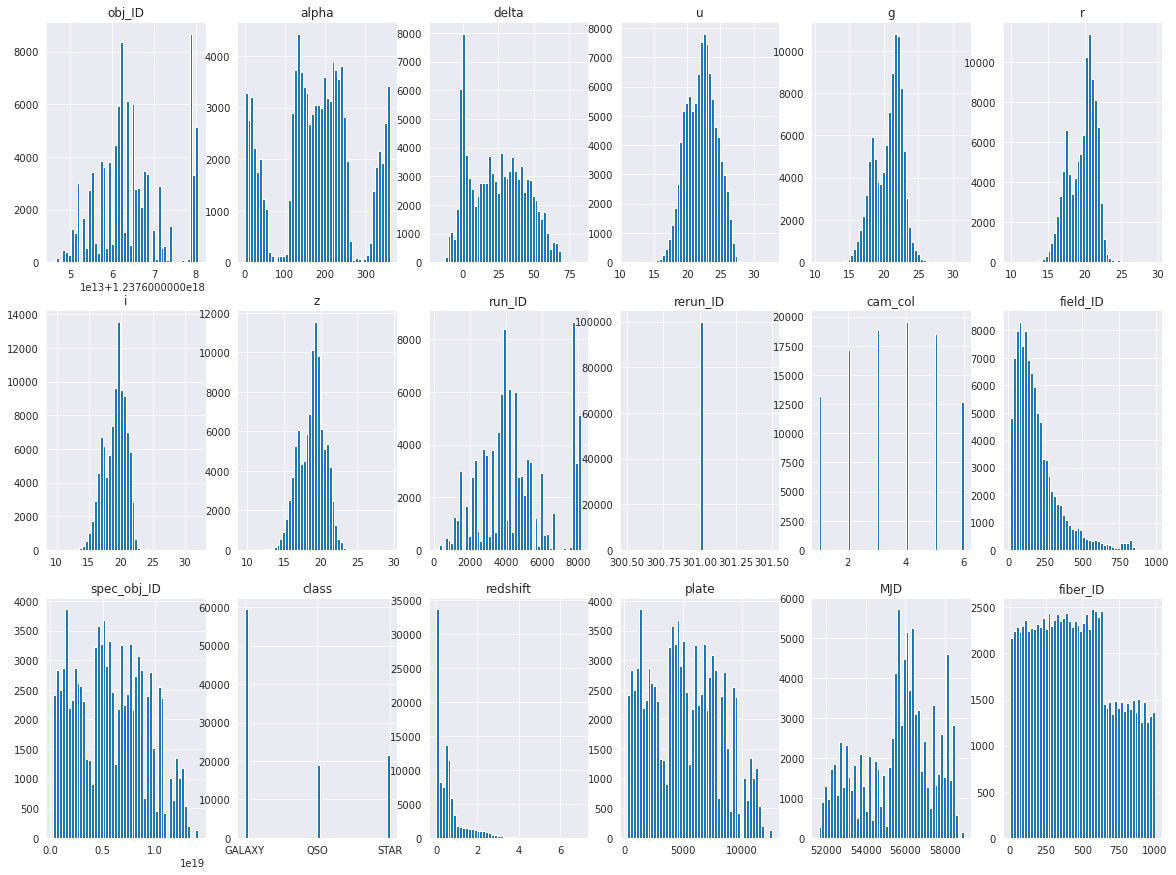

In [5]:
## The Histograms of the data

# Creating a figure and axis for each attribute
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 15))

# Iterating over each column and creating a histogram for each attribute (and showing it of course)
for i, column in enumerate(stellardata.columns):
    ax = axes[i//6, i%6]
    ax.hist(stellardata[column], bins=50)
    ax.set_title(column)

print('Figure 1: Histogram of each attribute in the data set')
plt.show()

From these histograms we can see that some attributes have a high distribution of their values.
For the identification attributes this makes sense, since you don't want two galaxies, stars or quasars to have the same identification.
What we can see though is that for the _r_ attribute for instance, the biggest amount of values is centered between 15 and 25 (as is the same for the _u_ and _g_ attributes).
This means that when we make the boxplots in the section, we are to expect quite a few outliers, since these values won't be part of the 10th to 90th percentile.

The assumption we make here now is that the initial decision on whether something is classified as a star, galaxy or quasar is not based on the filter attributes, since their values are too close together. So, once we create decision trees on the data we expect that other attributes are earlier splitting decision than these.

Figure 2: Boxplot of each attribute, except for "class", in the data set


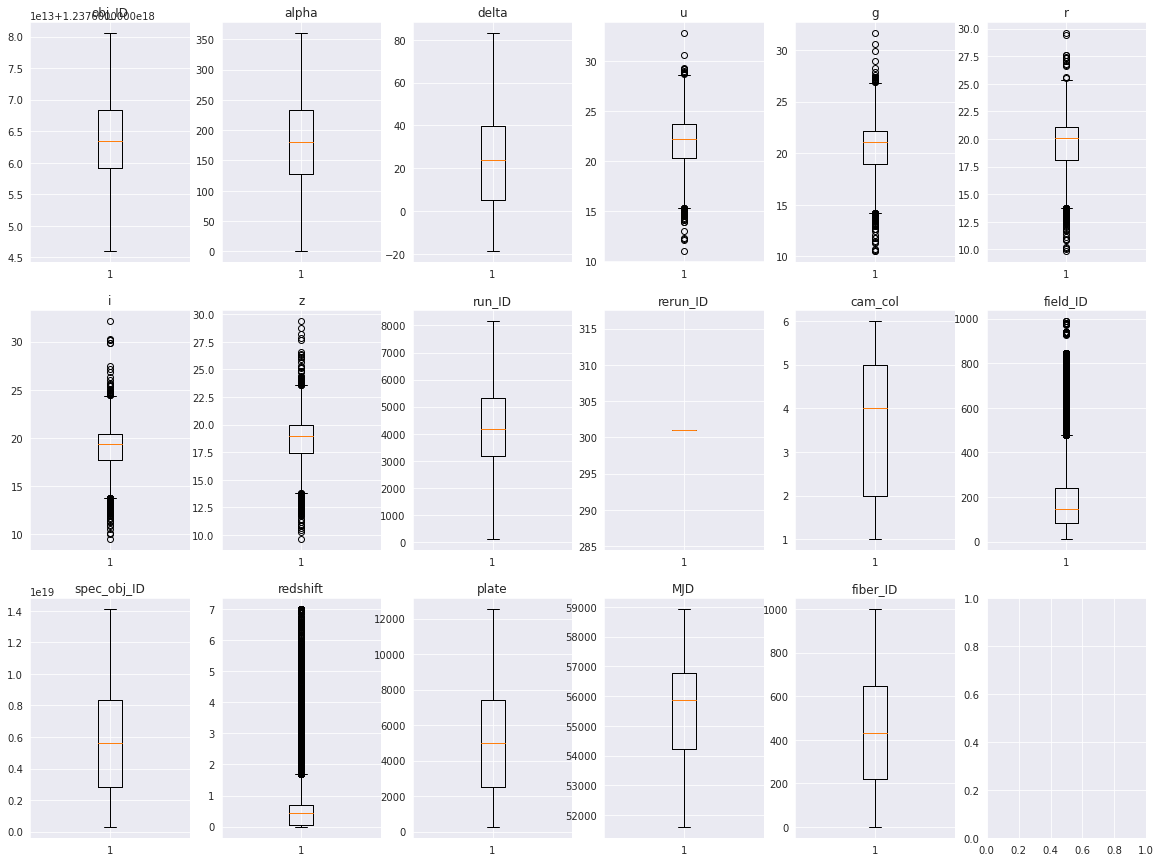

In [6]:
## The boxplots of the data

# Remove the 'class' columns from the data, since that column gives errors and doesn't allow the code to fully execute
columns_to_plot = [col for col in stellardata.columns if col != 'class']

# Create a figure and axis for each column
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 15))

# Iterate over each column and create a boxplot
for i, column in enumerate(columns_to_plot):
    ax = axes[i//6, i%6]
    ax.boxplot(stellardata[column])
    ax.set_title(column)

# Show the plots
print('Figure 2: Boxplot of each attribute, except for "class", in the data set')
plt.show()

If you pay close attention to the number of boxplots we have plotted, it is visible that the boxplot of the 'class' attribute is missing.
When we were creating a boxplot for every attribute, we got the following error:
"ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe'".
As far as we know, this error arises from the fact that the 'class' attribute is not a numerical attribute, and that for that reason, it is not possible from making a boxplot.

But, from the other 17 boxplots we can see which attributes have many outliers, or which attributes have not so many outliers.
These plots are very relatable to the histograms, as for instance the attribute _r_ shows that is has many outliers, since most values are between the 10th and 90th percentile, except for those outliers.
Here some attributes still don't show us much information, though we do know that they have normal values (since we examined that manually in the beginning of this section).

Figure 3: Class Distribution visual representation based on numbers.
Number of galaxies: 59445
Number of quasars: 18961
Number of stars: 21594


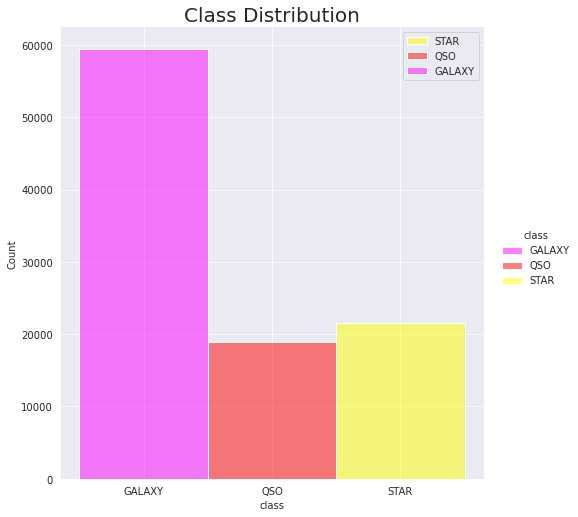

In [7]:
print("Figure 3: Class Distribution visual representation based on numbers.")
print("Number of galaxies: 59445")
print("Number of quasars: 18961")
print("Number of stars: 21594")

# Create a distribution plot of the 'class' column
sns.displot(data=stellardata, x='class', hue='class', height=7 , palette=['magenta', 'red', 'yellow'])

# Set the title and font size of the plot
plt.title('Class Distribution', fontsize=20)

# Add a legend to the plot with the class names
plt.legend(['STAR', 'QSO', 'GALAXY'])

As we can see from the dataset, the class distribution is heavily imbalanced. The majority of the objects in the survey are galaxies, while the number of other classes such as quasars and stars is much smaller in comparison. This can potentially affect the performance of machine learning algorithms trained on this dataset, as they may be biased towards the majority class. To address this issue, we may need to improvise along the way.

Circle diagram to represent the proportion of the class attribute, since a boxplot can't be made of this attribute due to it not being a numerical attribute.

In [8]:
#This is a diagram from the notebook we found on Kaggle
print("Figure 4: Circle diagram of the class attribute")
plotly.express.pie(stellardata, names='class', title='Proportion Of Different Class', hole=0.33)

Figure 4: Circle diagram of the class attribute


## 2.3 Creating a test-set
Before we start creating fancy models, we will here create the test and training sets. The test set will consist of 20% of the samples, meaning the test size will be 20000 samples, and the training size will be 79999 samples. Since the number of samples is quite high, we'd figure that splitting up the data like this would be a good idea, and if we were to change it for certain reasons, then this will be noted once it happens. We remove (or drop) the 'class' attribute, since that will be the attribute that determines whether new data is classified as a star, a galaxy or a quasar.

In [9]:
# Drop/remove the class attribute from the training and test sets
X = stellardata.drop('class', axis=1)
y = stellardata['class']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=35)

print("The size of the training set is", len(X_train), "samples")
print("The size of the test set is", len(X_test), "samples")

The size of the training set is 79999 samples
The size of the test set is 20000 samples


# 3. Discovering and visualizing the data to gain insights

Discovering and visualizing the data is an essential step in the data analysis process, as it helps to understand the characteristics and patterns of the data, identify any issues or problems, and formulate hypotheses or research questions.

There are various techniques and tools that can be used to discover and visualize the data, depending on the type and complexity of the data and the specific goals of the analysis.

By discovering and visualizing the data, it is possible to gain valuable insights that can inform further analysis, decision-making, and communication of the results.

In [10]:
#make a copy of the current data
stellardata = steallardata_raw.copy()

# List of class names
Classes_list = ['GALAXY', 'QSO', 'STAR']

# List of colors to use for the different types of plots (since they work well together)
colors = ['magenta', 'red', 'yellow']

In order to train our machine learning models efficiently, it is important to choose features that are able to distinguish well between the different classes in our data.
In this case, the features 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'plate', and 'MJD' are all astronomical quantities, so we will use them as our primary features. It is possible that some of these attributes will still be dropped later on, but that depends on the results that we find. The goal is to find the most suitable attributes for our algorithm and train the model on them.


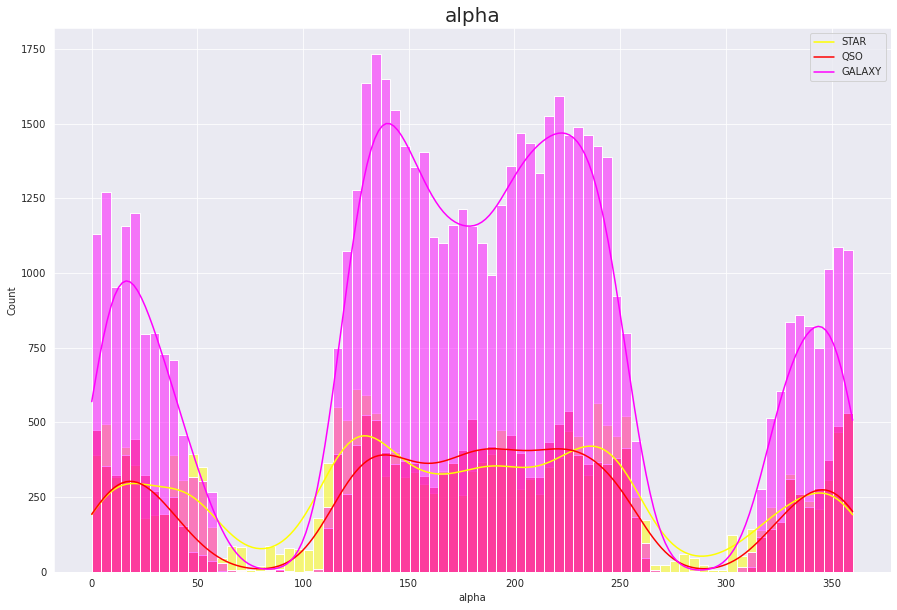

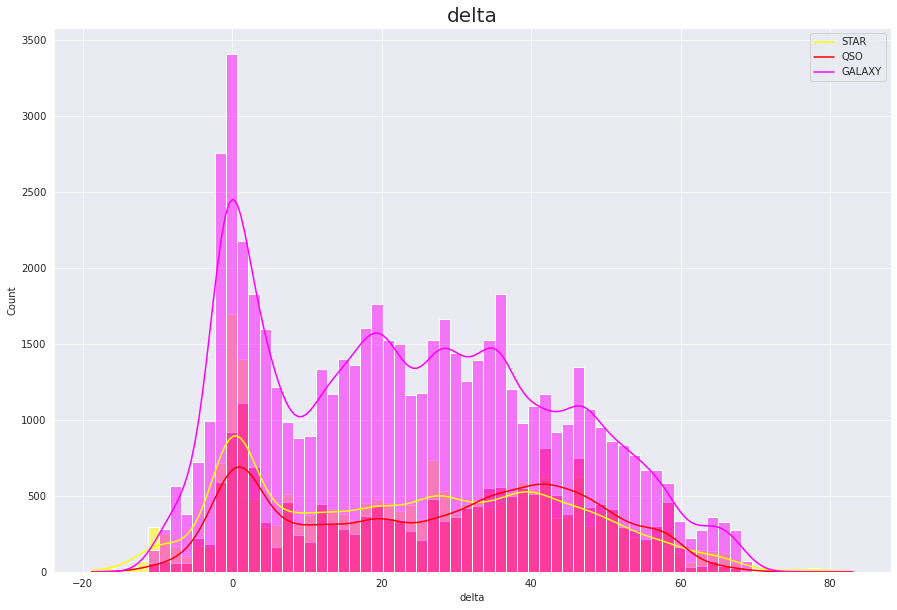

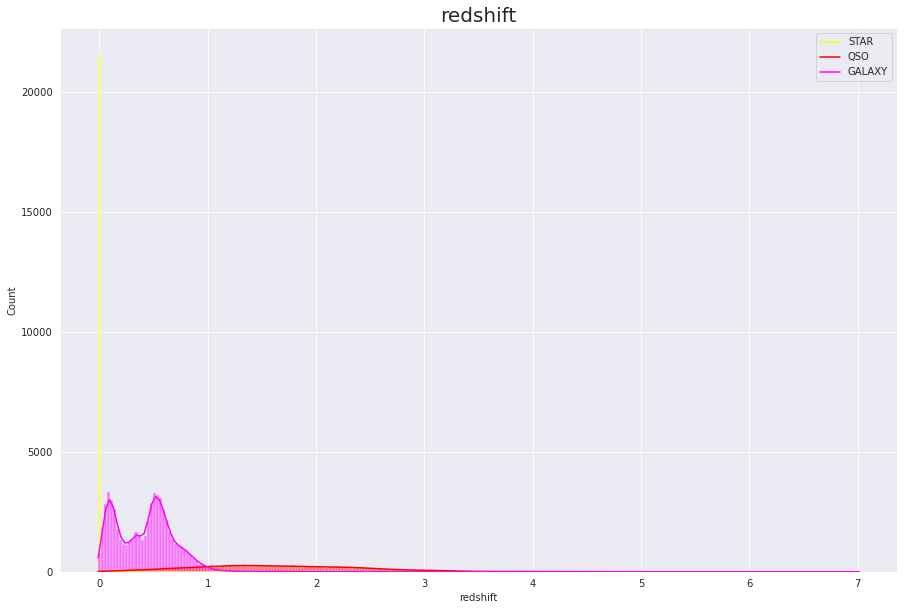

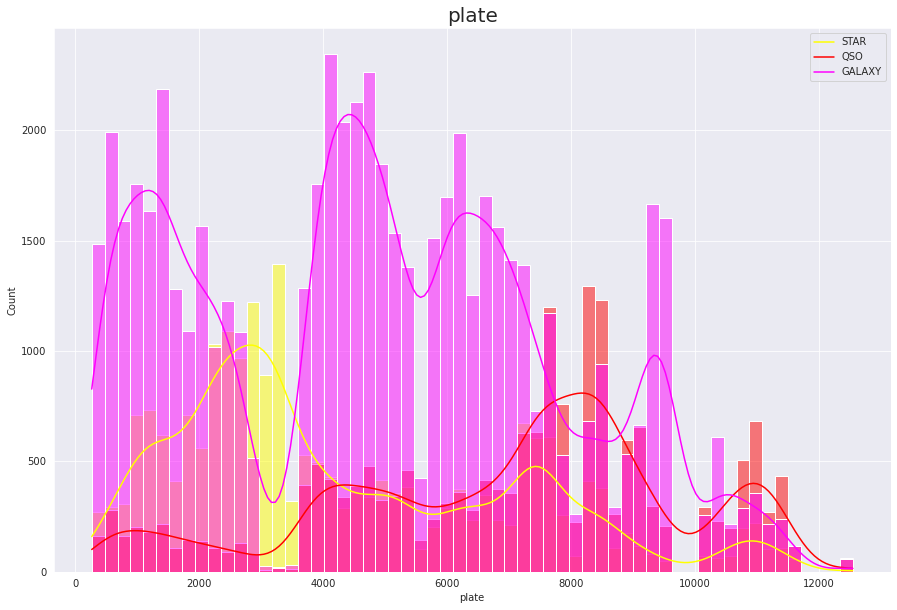

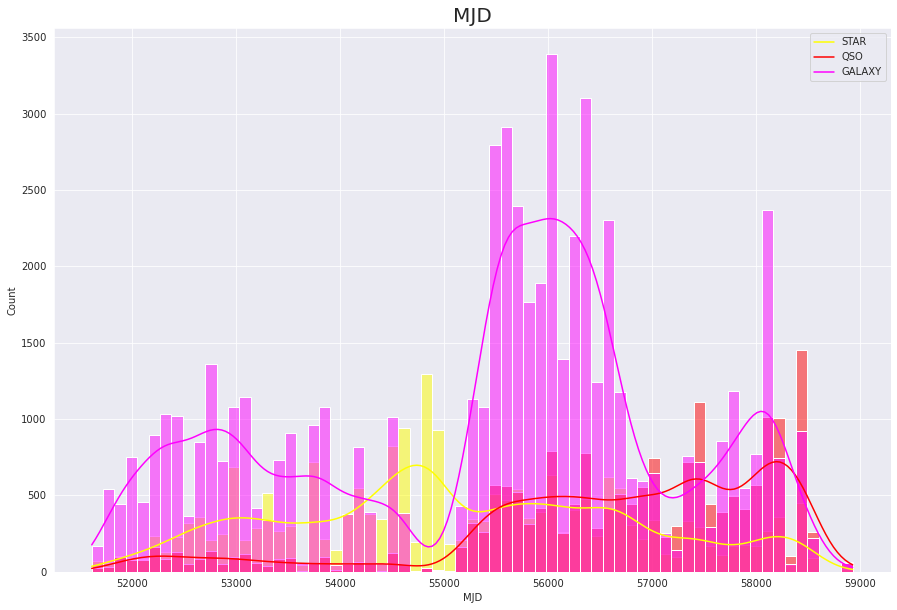

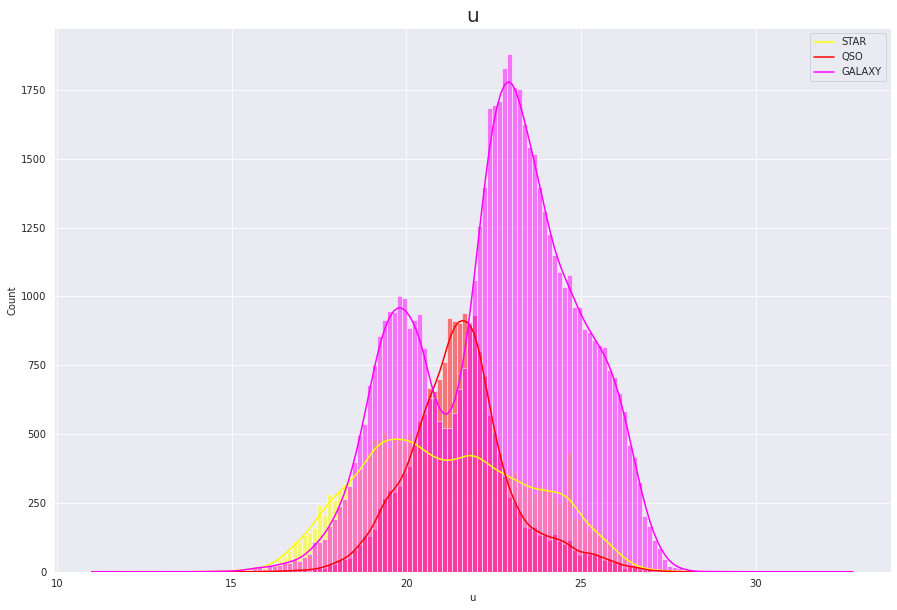

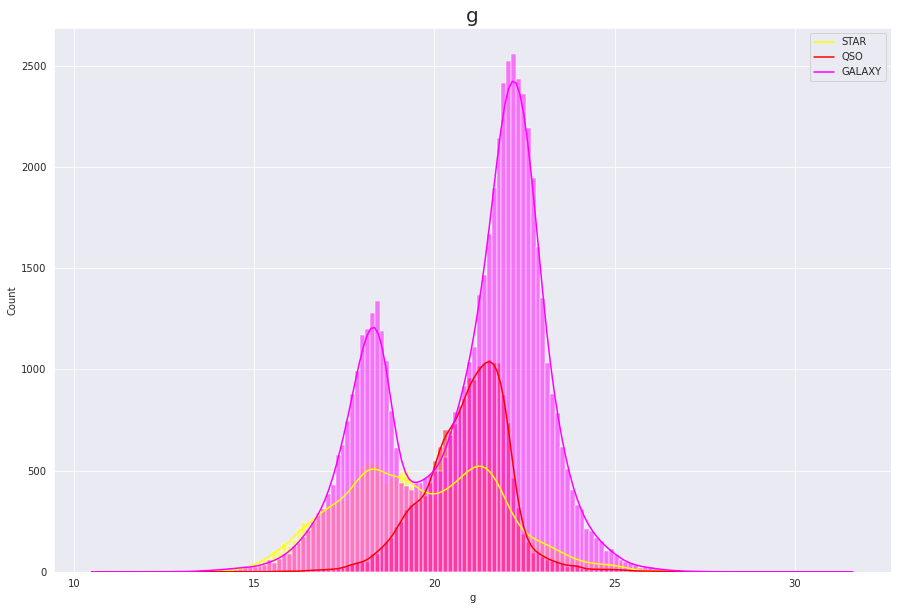

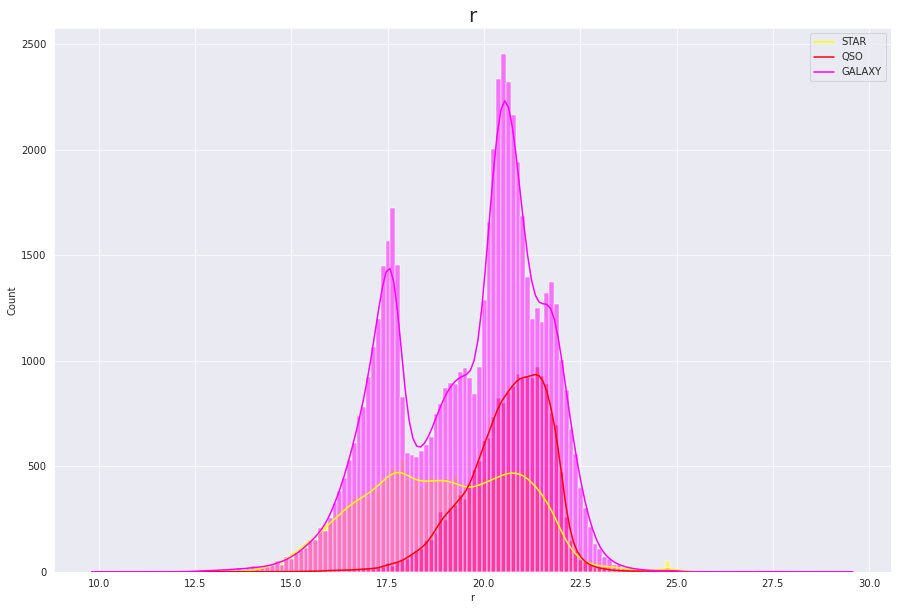

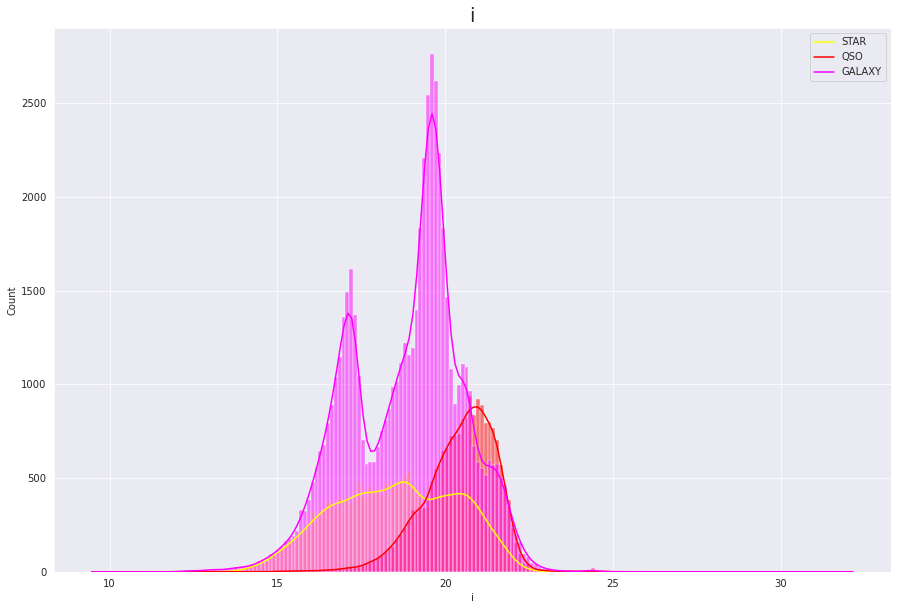

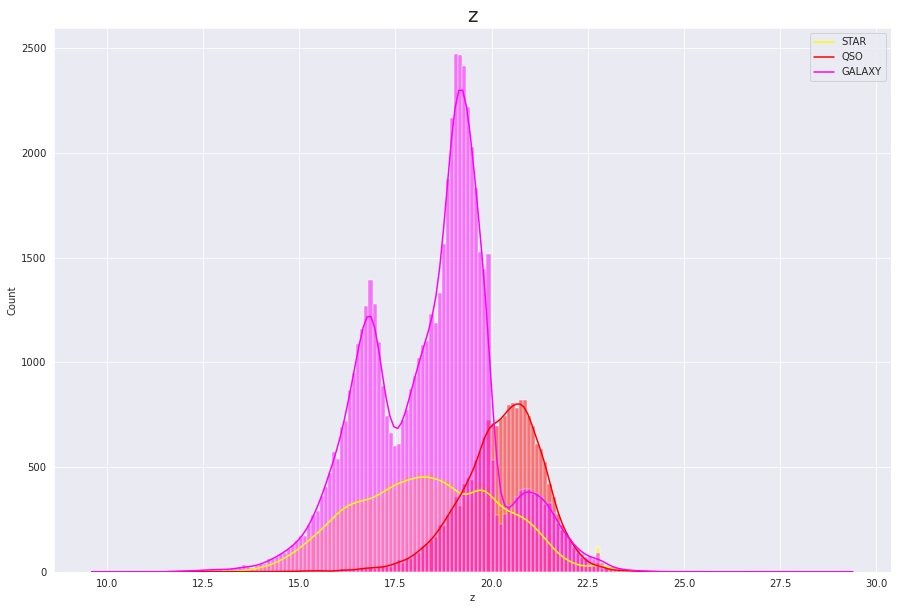

In [11]:
# Iterate over all the attributes in the list
for col in ['alpha', 'delta', 'redshift', 'plate', 'MJD', 'u', 'g', 'r', 'i', 'z']:

    # Create a new figure
    plt.figure(figsize=(15,10))

    # Plot a histogram and kernel density estimate plot for the column
    sns.histplot(data=stellardata, x=col, kde=True, hue="class", palette=colors)

    # Set the title, make a legend and show the plot
    plt.title(col, fontsize=20)
    plt.legend(['STAR', 'QSO', 'GALAXY'])
    plt.show()

These histograms show us that the filter values are all overlapping and difficult to distinct from each other. Again here we can see that the number of galaxy observations in the entire data set is extremely high compared to the other classes. These histograms do give us some insight in that the redshift value is fairly well distributed and that it is maybe good to distinguish the stars, galaxies and quasars on that value. We do though want to visualize some more before we come to any conclusions.

In [12]:
# Create three data frames by subsetting stellardata based on values in 'class' column in order to be able to compare them
galaxy =  stellardata[stellardata['class'] == 'GALAXY']
qso =  stellardata[stellardata['class'] == 'QSO']
star =  stellardata[stellardata['class'] == 'STAR']

# Instantiate LabelEncoder object
le = LabelEncoder()

# Transform 'class' column of stellardata using fit_transform method of LabelEncoder object
stellardata["class"] = le.fit_transform(stellardata["class"])

# Convert 'class' column to int data type
stellardata["class"] = stellardata["class"].astype(int)

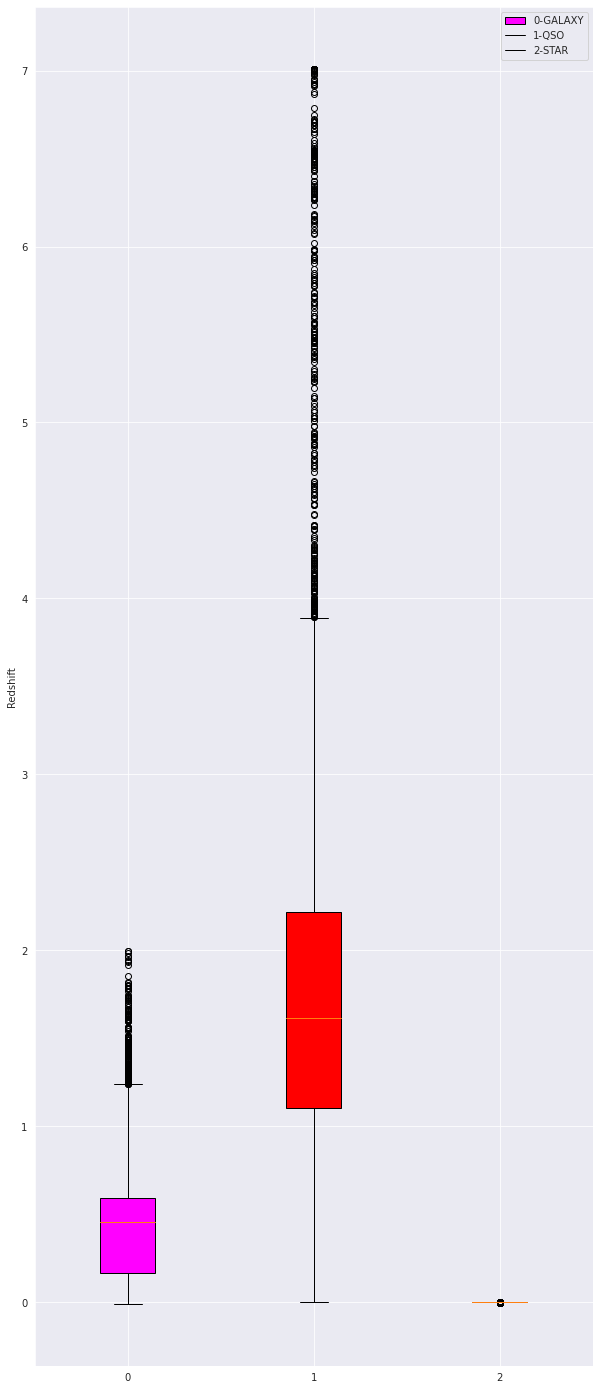

In [13]:
# Create data frame with 'redshift' and 'class' columns
redshift = stellardata[['redshift', 'class']]

# Create a list of data frames, each containing the 'redshift' column for a specific value in 'class'
data = [galaxy['redshift'], qso['redshift'], star['redshift']]

# Get unique values in 'class' column
Classes = stellardata['class'].unique()

# Create a figure and an axis
fig, ax1 = plt.subplots(figsize=(10, 25))

# Create box plot using data and specified colors, with labels corresponding to unique values in 'class'
boxplot1 = ax1.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=Classes)  # will be used to label x-ticks

# Iterate through boxes and set facecolor for each box
for patch, color in zip(boxplot1['boxes'], colors):
    patch.set_facecolor(color)

# Add horizontal grid lines
ax1.yaxis.grid(True)

ax1.set_ylabel('Redshift')

plt.legend(['0-GALAXY', '1-QSO', '2-STAR'])

plt.show()

The main difference between the classes in this dataset is the redshift value, which is a measure of how much the object's light has been shifted towards the red end of the spectrum due to the expansion of the universe. The redshift values for stars are expected to be very small because they are relatively close to Earth and their motion is mainly influenced by gravity. In contrast, galaxies and quasars (QSOs) have higher redshift values because they are farther away. QSOs have a higher median redshift and a wider range of values compared to galaxies. A Kernel Density Estimate (KDE) plot, which is similar to a histogram but shows the probability density of values rather than their frequency, confirms that the redshift values for stars are much smaller than those of the other classes. The distribution of redshift values for galaxies has two main groups centered at low and high values.

With this somewhat definition, we Galaxies can have a redshift value somewhere between 0 and 1.
We note that the weak overlap between the redshift distributions of galaxies and QSOs suggests that redshift will be a useful feature for classification.

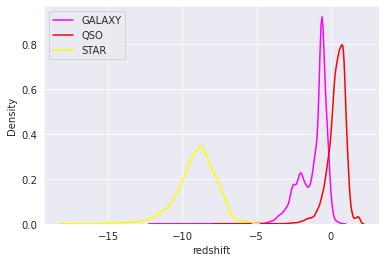

In [14]:
# Iterate over the classes
for i in Classes:
    # Plot Kernel Density Estimate of 'redshift' column for each class
    # Data is transformed using log function to make it easier to visualize
    # Label for each class is obtained by inverting the label encoding applied earlier
    sns.kdeplot(data=np.log(stellardata[stellardata["class"] == i]['redshift']),
                label = le.inverse_transform([i]),
                color=colors[i])

# Add legend to the plot with the class names
plt.legend(Classes_list)

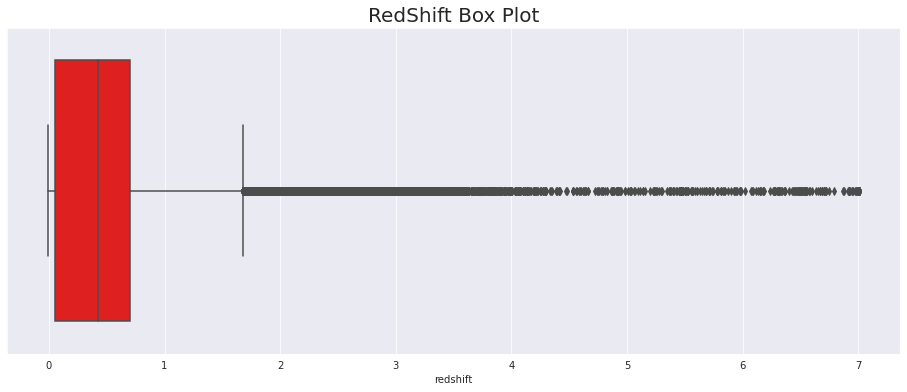

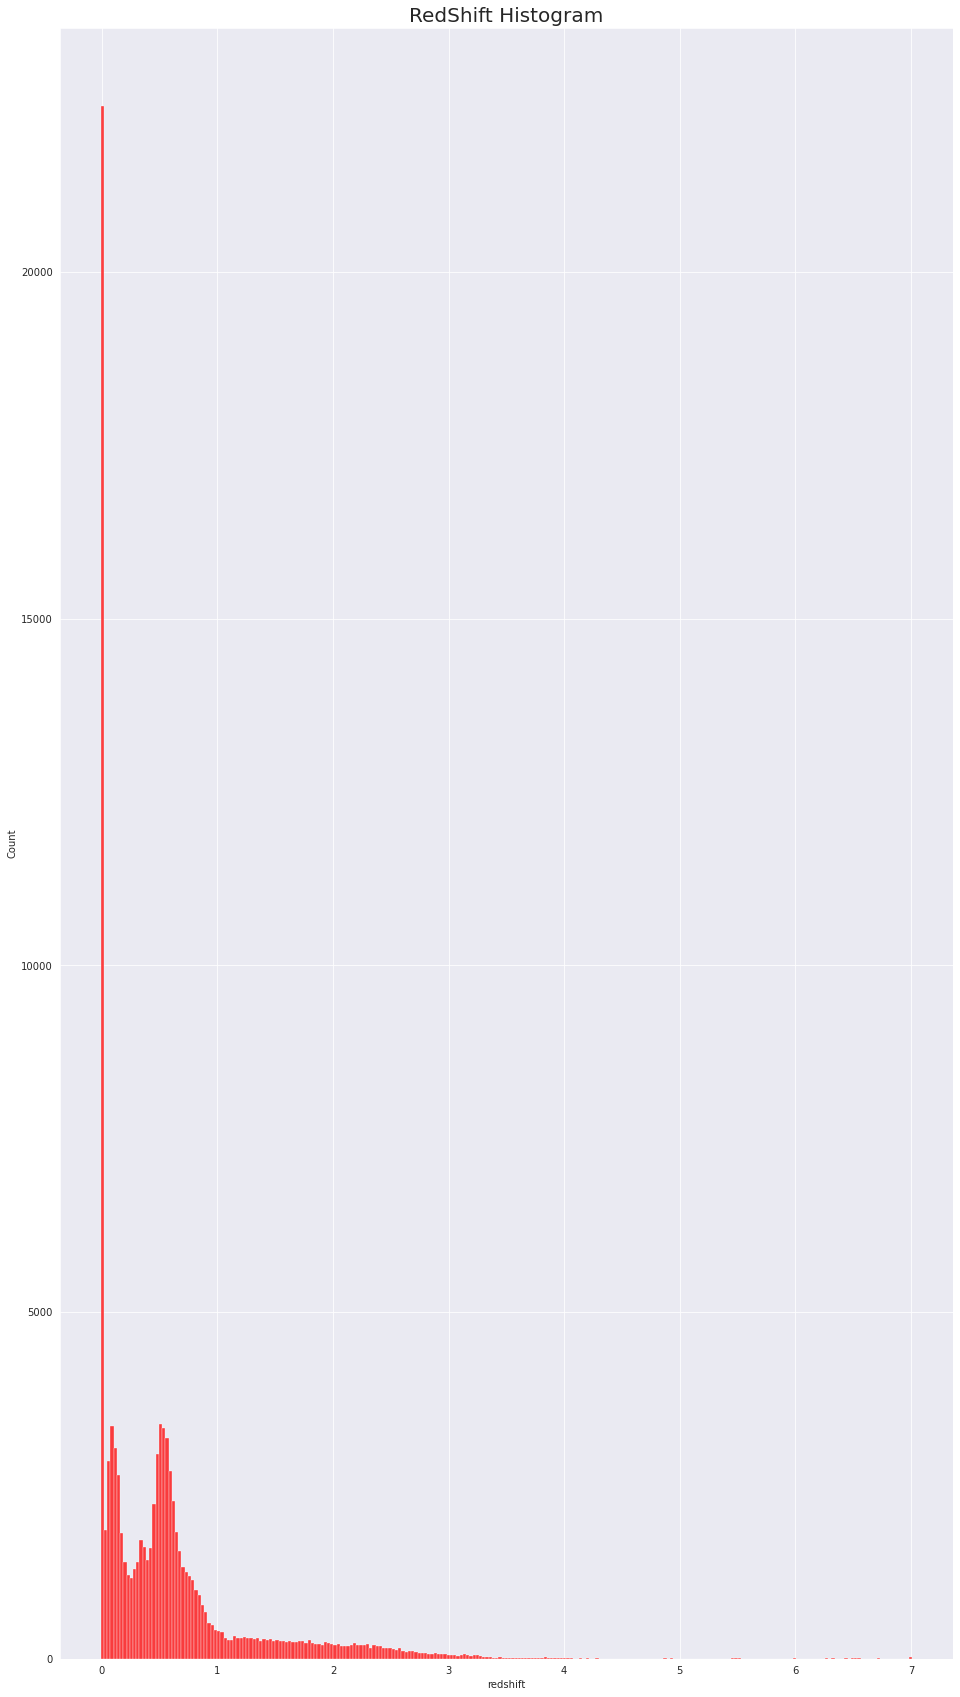

In [15]:
# Create a figure with a specific size
fig = plt.figure(figsize=(16, 6))

# Create a horizontal boxplot
sns.boxplot(data=stellardata, x="redshift", orient="h" , color='red')

# Set the title of the plot
plt.title("RedShift Box Plot",fontsize=20)

# Show the plot
plt.show()

# Create a figure with a specific size
fig = plt.figure(figsize=(16, 30))

# Creaate a histogram
sns.histplot(data=stellardata, x="redshift" , color='red')

# Set the title of the plot
plt.title("RedShift Histogram",fontsize=20)

# Show the plot
plt.show()

In the realm of celestial bodies and their observation through telescopes, it is well-established that a lower magnitude value corresponds to a higher level of luminosity. This is particularly evident when considering the brightness of stars, which are among the most radiant objects that can be observed in the night sky. One aspect of this phenomenon that is of particular interest to astronomers is the manner in which different wavelengths of light can impact the perceived brightness of these celestial objects. For instance, when examining u-band light(ultraviolet), which is located in the ultraviolet portion of the electromagnetic spectrum, it is often the case that stars will appear particularly bright. This is due to the fact that the peak of a typical star's spectrum tends to fall within the UV wavelengths.

It is worth noting that, despite the fact that quasars (QSOs) are typically located at much greater distances from Earth, they tend to be brighter in the ultraviolet range compared to galaxies. This is due to the fact that QSOs tend to emit broad spectra that extend into the shorter wavelengths at an intense level, a characteristic that can be observed in a typical QSO spectrum. When analyzing data obtained through the use of a u-band filter, it is common to see significant overlap between the curves representing the brightness of QSOs, galaxies, and stars. However, even with this overlap, the three curves tend to have distinct shapes, suggesting that this particular filter may be valuable in terms of classifying celestial objects based on their spectral characteristics.

Turning to the g-band(green light), it is interesting to note that the brightness of QSOs tends to decrease and become more comparable to that of galaxies. Stars, however, still tend to be brighter on average. The boxplot for QSOs in this band tends to exhibit a relatively small interquartile range, which suggests that there is less variability among this type of object in terms of their brightness at this particular wavelength.

Note: The distribution of brightness values for each class in each filter is shown in a Kernel Density Estimate (KDE) plot, which is like a histogram but shows the probability density of values rather than their frequency. The shapes of the curves in the KDE plots are distinct, suggesting that these filters will be useful for classification.

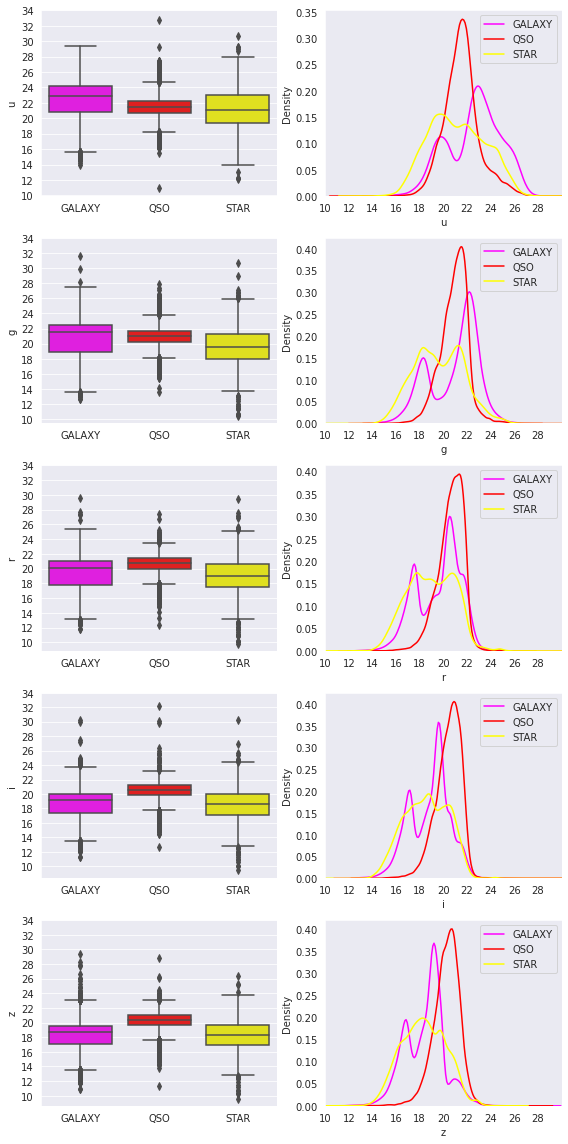

In [16]:
# List of data frames, each containing the 'u' column for a specific value in 'class'
data = [galaxy['u'], qso['u'], star['u']]

# Function to plot Kernel Density Estimate of a specified feature
def kde(feature, loc):
    # Iterate over the classes
    for i in range(3):
        # Plot Kernel Density Estimate of specified feature for each class
        # Label for each class is obtained by inverting the label encoding applied earlier
        sns.kdeplot(ax=loc,
                    data=stellardata[stellardata["class"] == i][feature],
                    label = le.inverse_transform([i]),
                    color=colors[i])
        # Add grid and set x-axis label, limits, and ticks
        loc.grid()
        loc.set_xlabel(feature)
        loc.set_xlim([10, 30])
        loc.set_xticks(np.arange(10, 30, 2))
        # Add legend
        loc.legend(Classes_list)

# Function to plot boxplot of a specified feature
def box(feature, loc):
    # List of data frames, each containing the specified feature column for a specific value in 'class'
    data = [galaxy[feature], qso[feature], star[feature]]

    # Plot boxplot of specified feature for each class
    sns.boxplot(ax=loc, data=data)
    # Set x-axis tick labels and y-axis ticks and label
    loc.set_xticklabels(Classes_list)
    loc.set_yticks(np.arange(10, 36, 2))
    loc.set_ylabel(feature)

# Set the color palette to a specific list of colors
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['magenta', 'red', 'yellow'])

# Initialize figure with 5 rows and 2 columns of subplots
fig, ax = plt.subplots(5, 2, figsize=(8, 16))

# Plot Kernel Density Estimate and boxplot for 'u' feature
kde('u', ax[0, 1])
box('u', ax[0, 0])

# Plot Kernel Density Estimate and boxplot for 'g' feature
kde('g', ax[1, 1])
box('g', ax[1, 0])

# Plot Kernel Density Estimate and boxplot for 'r' feature
kde('r', ax[2, 1])
box('r', ax[2, 0])

# Plot Kernel Density Estimate and boxplot for 'i' feature
kde('i', ax[3, 1])
box('i', ax[3, 0])

# Plot Kernel Density Estimate and boxplot for 'z' feature
kde('z', ax[4, 1])
box('z', ax[4, 0])

# Adjust spacing between subplots in current figure so that there is no overlap
plt.tight_layout()

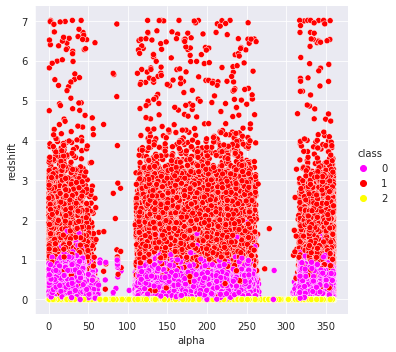

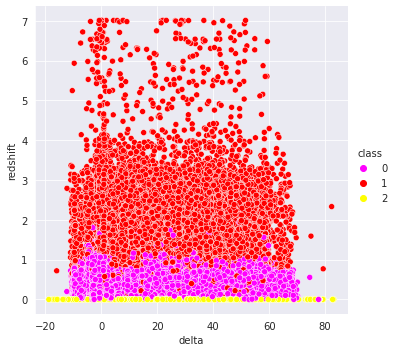

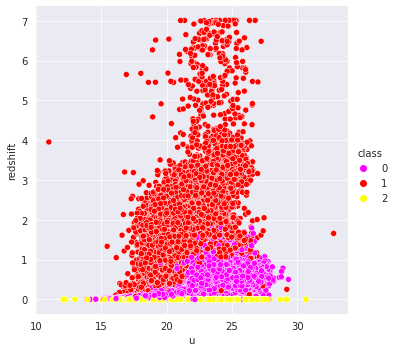

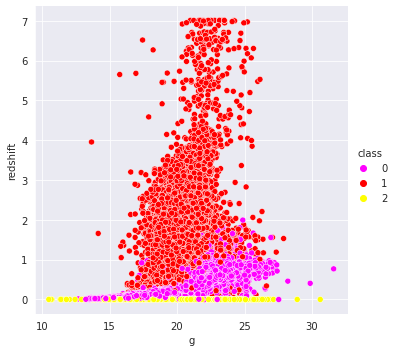

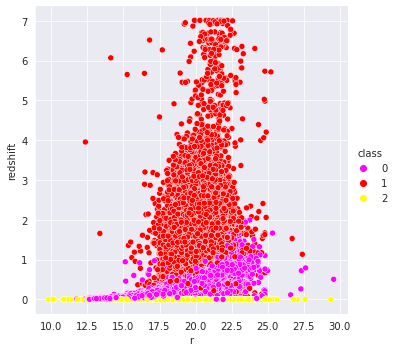

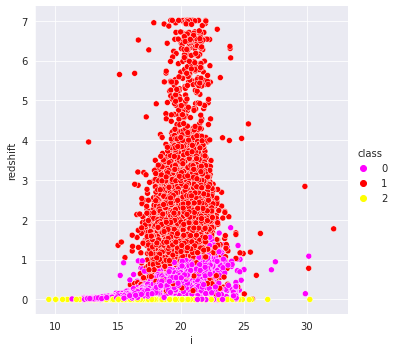

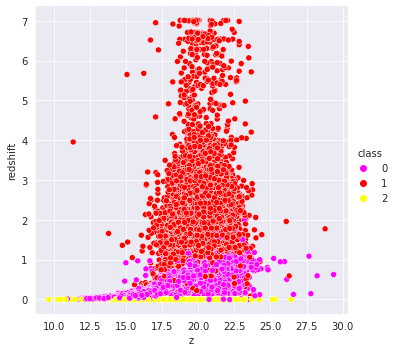

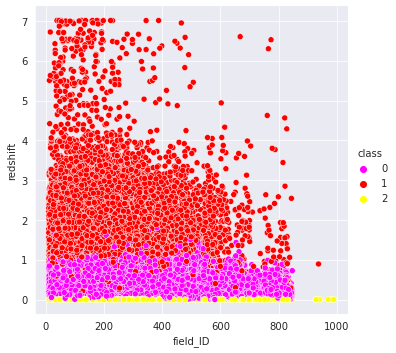

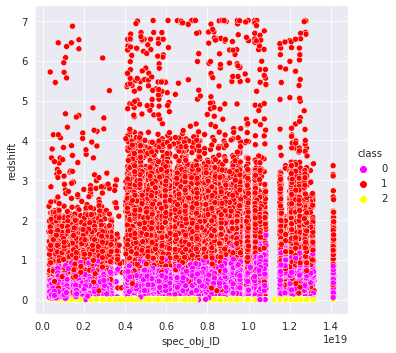

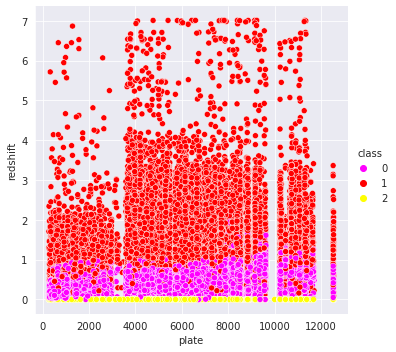

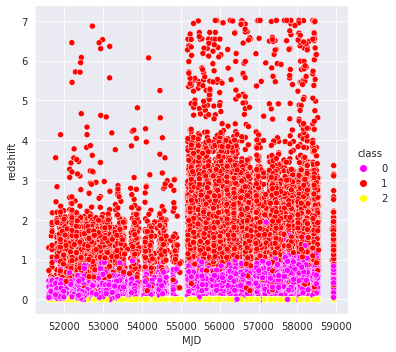

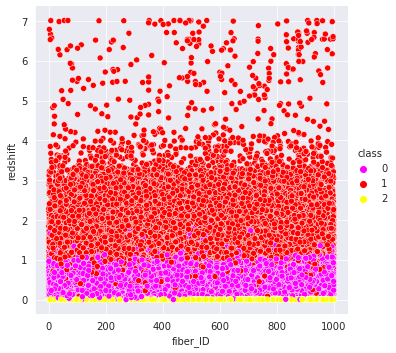

In [15]:
# The 'redshift' attribute is significant while classifying the data
# We will plot the variations in other attributes with respect to 'redshift' using a loop to create multiple plots

# Initialize an empty list to store the plots
plots = []

# Loop through all the attributes
for i in ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'field_ID', 'spec_obj_ID',
          'plate', 'MJD', 'fiber_ID']:
    # Create a scatterplot with the current attribute on the x-axis and 'redshift' on the y-axis
    plot = sns.relplot(data=stellardata, x=i, y='redshift', hue='class', palette=colors)
    # Add the plot to the list
    plots.append(plot)

These plots show the distribution of data points with respect to the 'redshift' attribute and can help us identify irrelevant attributes.
In the plot, the classes are the following:

Class 0 : Galaxies
Class 1 : QSO
Class 2 : Star

In the 'redshift' feature, if the value is negative (blueshift), the observation is more likely to be a Star.
If the value is positive (redshift), the observation is more likely to be Galaxy.
For the quasar value, it should be more than 0.5

The last test we want to do is to see the correlation between some of the attributes, and see which ones are most similar.

Figure showing all the correlation scatter plots


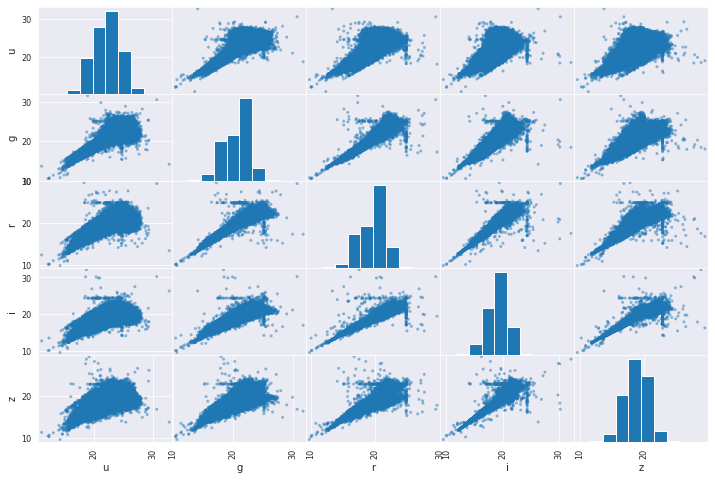

In [20]:
#We create a correlation matrix
corr_matrix = stellardata.corr()
#print("The correlation values for each attribute:\n", corr_matrix)

#There is quite a lot of data in the matrix, but with a quick look we can see that the filter values (u, g, r, i and z) all have a high correlation to each other.
#Because of this, we'll check each one on out and see what filters are most correlated to each other. #If we use the panda dataframe, we can only show one matrix at a time, but we'll provide the code for each.

#print("the correlation matrix for the u attribute:")
#corr_matrix["u"].sort_values(ascending=False)

#The u attribute has the highest correlation with the g attribute, namely 0.853....
#Then r, i and z respectively

#print("the correlation matrix for the g attribute:")
#corr_matrix["g"].sort_values(ascending=False)

#The g attribute has the highest correlation with the r attribute, namely 0.932....
#Then u, i and z respectively

#print("the correlation matrix for the r attribute:")
#corr_matrix["r"].sort_values(ascending=False)

#The r attribute has the highest correlation with the i attribute, namely 0.962....
#Then g, z and u respectively

#print("the correlation matrix for the i attribute:")
#corr_matrix["i"].sort_values(ascending=False)

#The i attribute has the highest correlation with the z attribute, namely 0.971....
#Then r, g and u respectively, where z has a lower correlation with u than z has with the MJD and plate attributes.

#print("the correlation matrix for the z attribute:")
#corr_matrix["z"].sort_values(ascending=False)

#The z attribute has the highest correlation with the i attribute, namely 0.971....
#Then r, g and u respectively, where z has a lower correlation with u than z has with the MJD and plate attributes.
#This is the same as what the i attribute showed us.

attributes = ["u", "g", "r", "i", "z"]
scatter_matrix(stellardata[attributes], figsize=(12, 8))
print('Figure showing all the correlation scatter plots')

Scatter plot of the attribute i mapped to the attribute z and the scatter plot of the attribute z mapped to the attribute i


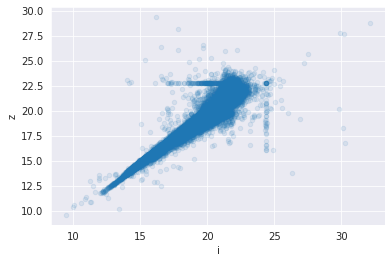

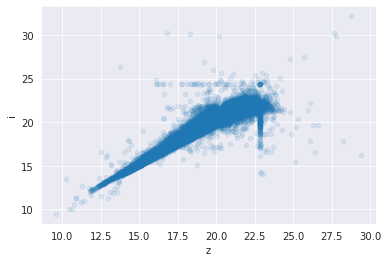

In [22]:
#Most of the plots look like each other, but we're going to zoom in on a few to see what information we can gather from them.
#From the correlation values we saw that i and z were the most correlated out of all of them, so we zoom in on those scatter plots.
#
stellardata.plot(kind="scatter", x="i", y="z", alpha=0.1)
stellardata.plot(kind="scatter", x="z", y="i", alpha=0.1)
print("Scatter plot of the attribute i mapped to the attribute z and the scatter plot of the attribute z mapped to the attribute i")

#This plot reveals a few things. First, the correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed.
#We can also see a horizontal line where i is almost 25 and z is just over 22.5. If we look at the histograms we made earlier in the notebook, we can see that the values don't really go beyond the z = 22.5 and i = 25 mark. There are still outliers for both attributes, hence there are extra dots in the plot here and there.
#There are no other horizontal lines in the plot meaning that we don't have to remove any potential attributes or values, which saves us some time.

#You might wonder why we have chosen to map the filter values to each other instead of other values.
#The main reason why is that all the other attributes have either a low or a very low correlation value to other attributes, meaning they almost have no correlation to each other.
#ULtimately, this won't teach us much, except for being able to say that the alpha and delta attributes have an extremely low correlation value of 0.13.

# 4. Preparing the data for Machine Learning algorithms

In [23]:
#make a copy of the current data
stellardata = steallardata_raw.copy()

# List of class names
Classes_list = ['GALAXY', 'QSO', 'STAR']

# List of colors to use for box plots
colors = ['magenta', 'red', 'yellow']

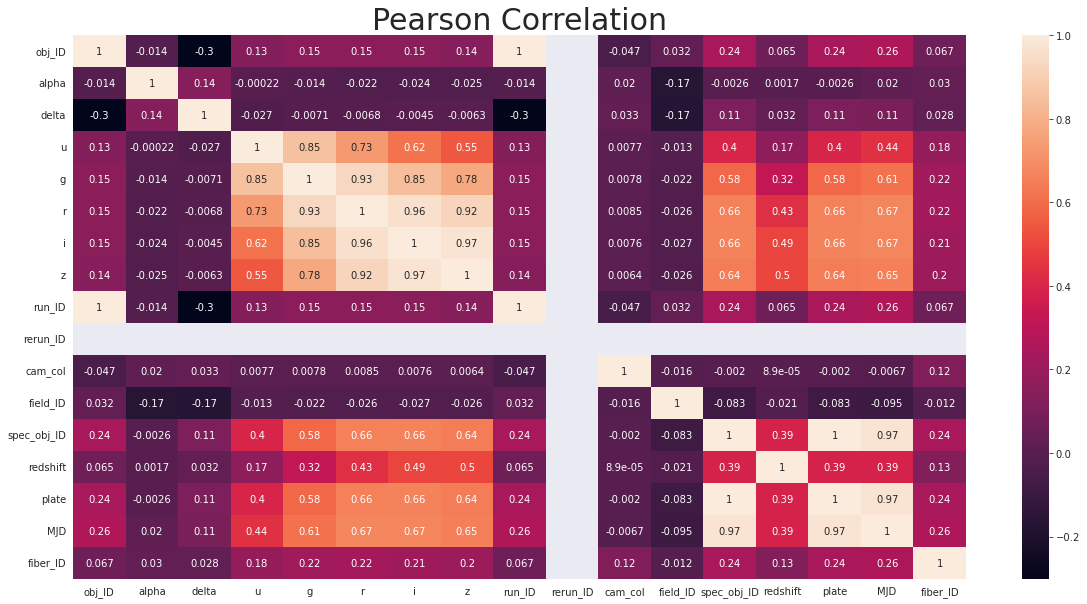

In [24]:
# Create a figure with a specific size
plt.figure(figsize=(20,10))

# The 'annot' argument specifies whether to show the values in each cell of the heatmap
sns.heatmap(stellardata.select_dtypes(include=["int","float"]).corr(), annot=True)

# Set the title of the plot
plt.title('Pearson Correlation',fontsize=30)

# Display the plot
plt.show()

This Pearson correlation shows us a more 'pretty' overview of all the correlation values between attributes.
After some consideration, we decided on the fact to remove some attributes in the data set.
As we've seen so far, some attributes, like some identification attributes don't add any value to us classifying new values as a galaxy, star or galaxy.
From the correlation 'experiments' we've also seen that the (especially) alpha and delta attributes have low correlation to the other attributes.
This means that these attributes would provide low input for our classification model.
Therefore, we drop the following attributes:
   - obj_ID
   - alpha
   - delta
   - run_ID
   - rerun_ID
   - cam_col
   - field_ID
   - fiber_ID

In [19]:
# Drop unnecessary columns
stellardata = stellardata.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)

# Instantiate LabelEncoder object
le = LabelEncoder()

# Transform 'class' column of stellardata using fit_transform method of LabelEncoder object
stellardata["class"] = le.fit_transform(stellardata["class"])

# Convert 'class' column to int data type
stellardata["class"] = stellardata["class"].astype(int)

# Split the data into features (x) and labels (y)
x = stellardata.drop(['class'], axis = 1)
y = stellardata.loc[:,'class'].values

# Standardize the features
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [20]:
# We created a test set earlier on in the file, but we do it now here again for the creation of all the models.
# The test_size parameter determines the proportion of the data that will be used for the test set
# In this case, 20% of the data will be used for the test set and 80% will be used for the training set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

# Print the sizes of the training and test sets
print("The size of the training set is", len(X_train), "samples")
print("The size of the test set is", len(X_test), "samples")

The size of the training set is 79999 samples
The size of the test set is 20000 samples
Accuracy : 0.964


# 5. Selecting a model and training it

This part of the project is probably the most important, since it will determine which model we will use to predict our data with.
The way we are going to handle this section, is to implement some of the more well-known algorithms and to see what algorithm, when it's fitted to our model, gives the best results.
What these results are and what they mean will be discussed after the sections of code.
We will do our best to make it clear what algorithm is being fitted and what the results are with different hyperparameters.
This will be quite a long section, but ultimately the most important.

We'll start with a single Support Vector Machine, and then slowly add up the number of different algorithms.
Some cells will take a considerable amount of time before they are loaded, meaning that you are always able to grab a cup of coffee in between (especially the cells with a for-loop in them).

In [26]:
# Instantiate an SVM classifier with an RBF kernel
svm_clf = svm.SVC(kernel='rbf', C=1, random_state=0)

# Fit the classifier to the training data
svm_clf.fit(X_train,y_train)

# Use the classifier to make predictions on the test set
predicted = svm_clf.predict(X_test)

# Calculate the accuracy of the predictions
score = svm_clf.score(X_test, y_test)

# Calculate the mean accuracy across all cross-validation folds
svm_score_ = np.mean(score)

#Print the accuracy
print('Accuracy : %.3f' % svm_score_)

svm_cm = ConfusionMatrix(svm_clf, classes=['GALAXY', 'QSO', 'STAR'])

svm_cm.fit(X_train, y_train)
svm_cm.score(X_test, y_test)
svm_cm.show()

KeyboardInterrupt: 

In [22]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11904
           1       0.97      0.91      0.94      3810
           2       0.95      1.00      0.97      4286

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000



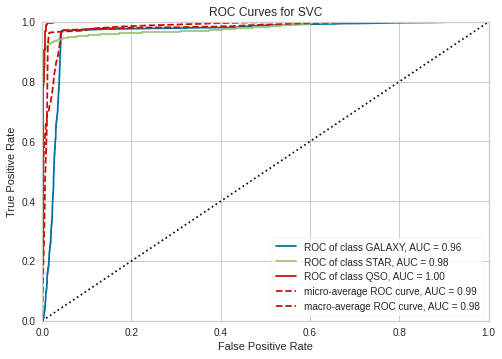

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [23]:
visualizer = ROCAUC(svm_clf, classes=['GALAXY','STAR','QSO'])

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
# Create a list of the different kernel types you want to try
kernel_types = ['linear', 'poly', 'sigmoid']

# Iterate over the kernel types
for kernel in kernel_types:
    # Instantiate an SVM classifier with the current kernel
    svm_clf = svm.SVC(kernel=kernel, random_state=0)

    # Fit the classifier to the training data
    svm_clf.fit(X_train, y_train)

    # Use the classifier to make predictions on the test set
    predicted = svm_clf.predict(X_test)

    # Calculate the accuracy of the predictions
    score = svm_clf.score(X_test, y_test)

    # Calculate the mean accuracy across all cross-validation folds
    svm_score_ = np.mean(score)

    # Print the accuracy of the predictions for the current kernel
    print(f'Accuracy for kernel {kernel}: {svm_score_:.3f}')

    # Create a confusion matrix for the current kernel
    svm_cm = ConfusionMatrix(svm_clf, classes=['GALAXY', 'QSO', 'STAR'])
    svm_cm.fit(X_train, y_train)
    svm_cm.score(X_test, y_test)
    svm_cm.show()

    # Create an ROC curve for the current kernel
    visualizer = ROCAUC(svm_clf, classes=['GALAXY','STAR','QSO'])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()


The confusion matrices are a helpful tool to see what type of kernel does best, but it is most clear from the ROC-curves that all kernels work exceptionally well except for the sigmoid kernel, which is an awful kernel for our classification problem. This means that we already have an amazing possible model, but we do want to try some other algorithms to see if we can get the accuracy even higher. The next algorithm to try is the gradient descent algorithm. As a note, the name of the classifiers are all an abbreviation, and then _clf for classifier behind it. This is mostly done for consistency and since most documentation uses this notation as well.

Accuracy: 0.9759


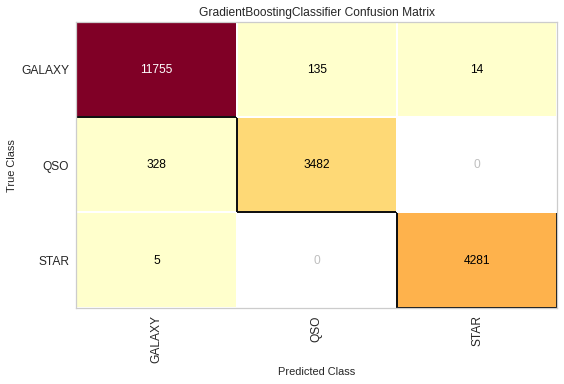

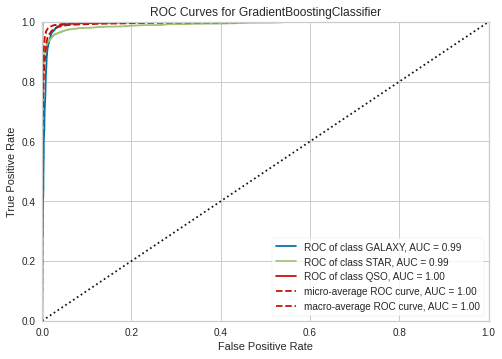

<AxesSubplot:title={'center':'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [44]:
#Gradient descent

# Instantiate a gradient boosting classifier
gb_clf = GradientBoostingClassifier()

# Fit the classifier to the training data
gb_clf.fit(X_train, y_train)

# Use the classifier to make predictions on the test set
predicted = gb_clf.predict(X_test)

accuracy = gb_clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Create a confusion matrix for the gradient boosting classifier
gb_cm = ConfusionMatrix(gb_clf, classes=['GALAXY', 'QSO', 'STAR'])
gb_cm.fit(X_train, y_train)
gb_cm.score(X_test, y_test)
gb_cm.show()

# Create an ROC curve for the gradient boosting classifier
visualizer = ROCAUC(gb_clf, classes=['GALAXY','STAR','QSO'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
print('ROC Curve and confusion matrix for the Gradient Boosting Classifier')

We can see that the Gradient Boosting Classifier works even better than the Support Vector Machines. An accuracy of 0.9759 is an amazing number, but we again want to try some more algorithms.
Next up we wanted to create neural networks on our data and see what the accuracy is on that model.

Accuracy: 0.9723
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11904
           1       0.96      0.92      0.94      3810
           2       0.97      1.00      0.98      4286

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



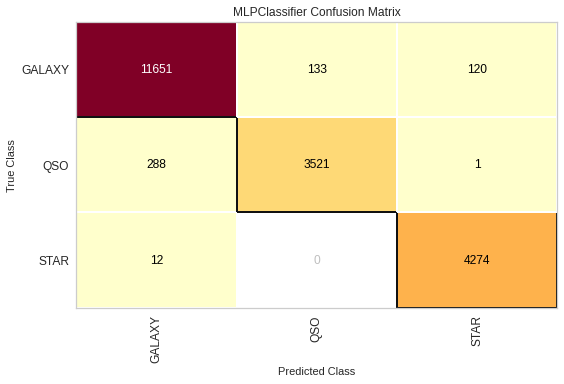

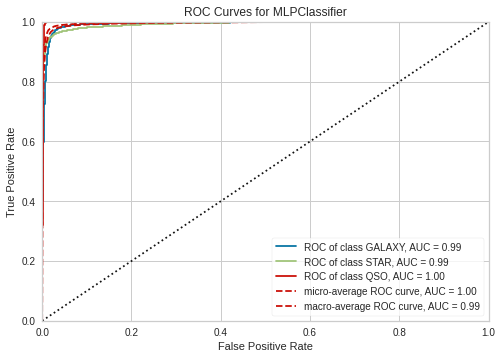

<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [43]:
# Instantiate the neural network classifier
nn_clf = MLPClassifier(random_state=42)
nn_clf.fit(X_train, y_train)
y_pred = nn_clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = nn_clf.score(X_test, y_test)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
cm = ConfusionMatrix(nn_clf, classes=['GALAXY', 'QSO', 'STAR'])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

# Creating an ROC curve for the neural network
visualizer = ROCAUC(nn_clf, classes=['GALAXY','STAR','QSO'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

Even though the difference is small, the accuracy when using the Neural Networks is lower than when using the Gradient Boosting, meaning neural networks might be not as good of an option.
As far as we know, the accuracy of the model is nearly perfect, but since we want to try different models and test what their results are, we are not done yet with testing and finding our best model.
The last two algorithms we are going to try are naive bayes and the random forrest classifier.


Accuracy: 0.88655


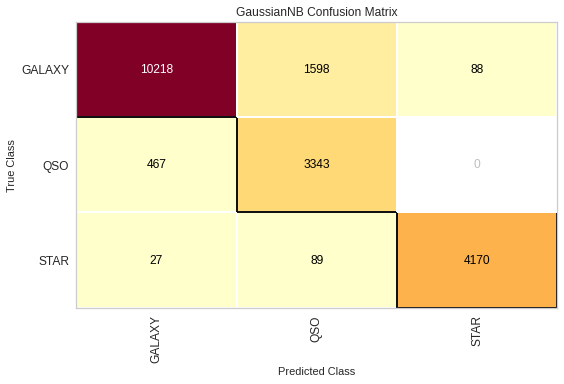

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [57]:
#Naive bayes
# Fit the Naive Bayes classifier to the training data
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Use the classifier to make predictions on the test set
predicted3 = nb_clf.predict(X_test)

accuracy = nb_clf.score(X_test, y_test)
print("Accuracy:", accuracy)
# Calculate the confusion matrix

cm = confusion_matrix(y_test, predicted3)
visualizer = ConfusionMatrix(nb_clf, classes=['GALAXY', 'QSO', 'STAR'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
rf_clf = RandomForestClassifier()

# Fit the model to the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf_clf.predict(X_test)

# Calculate the validation score and print it
print('Validation score with RF:', score(y_test, predictions))

# Generate the classification report
print(classification_report(y_test, predictions))

From the results we can see that the Random Forest Classifier is the model that produces the best accuracy out of all the algorithms we have tried, and that the naive bayes perform significantly worse.
Therefore, the Random Forest Classifier is our winner!
What this would mean is that if we were to train a model on our Stellardata, we would choose the Random Forest Classifier, since it would classify new data the best.

# 6. Presenting our results

We have reached the end of the project, and we can finally present our solutions (which have been discussed a bit in the previous section as well).
Therefore, the notebook comes to an end here, and the actual results will be discussed in the project report.